In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.ticker as plticker
import matplotlib
import warnings
from matplotlib import cm
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)
matplotlib.rcParams['font.family'] = "serif"
sns.set_style("whitegrid")
from scipy import stats
from scipy.stats import norm
pd.options.display.float_format = "{:.2f}".format
pd.set_option('display.max_columns',100)
import re

In [2]:
fifa = pd.read_csv(f'Fifa\data.csv')
backup = pd.read_csv(f'Fifa\data.csv')
fifa.shape

(18207, 89)

In [3]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [4]:
fifa = fifa.drop(((fifa.isnull().sum()).sort_values(ascending=False).head(27)).index.tolist(),axis=1)

In [5]:
features = ['Name','Age','Nationality','Overall','Potential', 'Club', 'Value',
            'Wage','Preferred Foot','International Reputation','Weak Foot','Skill Moves','Work Rate',
            'Body Type','Position','Joined', 'Contract Valid Until','Height','Weight','Crossing', 
            'Finishing','HeadingAccuracy','ShortPassing', 'Volleys', 'Dribbling','Curve','FKAccuracy',
            'LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions', 'Balance',
            'ShotPower', 'Jumping','Stamina', 'Strength','LongShots','Aggression','Interceptions','Positioning', 
            'Vision', 'Penalties','Composure','Marking','StandingTackle', 'SlidingTackle','GKDiving',
            'GKHandling','GKKicking','GKPositioning','GKReflexes']

In [6]:
data = fifa[features]
data['Height'].fillna("0'0",inplace=True)

In [7]:
def weight_lbs(w):
    col = w.replace('lbs','')
    return col

In [8]:
def values(v):
    col = v.replace('€', '')
    if 'M' in col:
        col = float(col.replace('M',''))*1000000
    elif 'K' in col:
        col = float(col.replace('K',''))*1000
    return float(col)

In [9]:
def age_groups(age):
    if age >= 16 and age <22:
        return '16-22'
    elif age >= 22 and age <28:
        return '22-28'
    elif age >= 28 and age <34:
        return '28-34'
    elif age >= 34 and age <40:
        return '34-40'
    else:
        return '40-45'

In [10]:
def feet_inches_cm(x):
    col = x.split("'")
    col = (int(col[0])*12 + int(col[1]) )
    return int(col*2.54)

In [11]:
def tall(x):
    if x >= 154 and x <170:
        return 'Small'
    elif x >= 170 and x <186:
        return 'Normal'
    else:
        return 'Very Tall'

In [12]:
def body_type(x):
    if x in ['Messi','C. Ronaldo','Shaqiri','Neymar','PLAYER_BODY_TYPE_25']:
        return 'Normal'
    elif x == 'Akinfenwa' or x == 'Courtois':
             return 'Stocky'
    else:
        return x

In [13]:
# Convert Wage and Values to number format!
data['Wage'] = data['Wage'].apply(lambda x: values(x)) 
data['Value'] = data['Value'].apply(lambda x: values(x)) 

In [14]:
# Change 159lbs to 159.00 format (str to float)
data['Weight'] = data['Weight'].apply(lambda x: str(x))
data['Weight'] = data['Weight'].apply(lambda x: x.replace('lbs',''))
data['Weight'] = data['Weight'].apply(lambda x: float(x))

In [15]:
data['Weight'].fillna(180, inplace = True)

In [16]:
# Age bands
data['Age Group'] = data['Age'].apply(lambda x: age_groups(x))

In [17]:
#Inches to feets
data['Height_cm'] = data['Height'].apply(feet_inches_cm)

In [18]:
data['Height Group'] = data['Height_cm'].apply(tall)

In [19]:
data['Skill Moves'].fillna(3.0,inplace=True)
data['Skill Moves'] = data['Skill Moves'].apply(lambda x: int(x))

In [20]:
#3 body types
data['Body Type'] = data['Body Type'].apply(body_type)

In [21]:
dummy = pd.get_dummies(data['Body Type'])
data = pd.concat([data,dummy],axis=1)

In [22]:
#Top 20 country with top Overall Rating
avg_nationality = data.groupby('Nationality')['Overall'].agg(['mean','count']).reset_index()
avg_nationality = avg_nationality[avg_nationality['count']>=100].sort_values(by='mean',ascending=False)[:10]

#Countries that are popular and well known of good football players
popular_countries = ['Portugal','England','Brazil','Spain','Italy','Germany','Argentina','France','Croatia']
popular = data.loc[data['Nationality'].isin(popular_countries)]

#Age groups
g = ((pd.DataFrame(data.groupby(['Nationality','Age Group'])['Name'].count())).rename(columns={'Name':'counts'})).reset_index()
g = g[g['Nationality'].isin(data['Nationality'].value_counts().index[:15])]
g = (g.pivot(columns='Age Group',index='Nationality',values='counts'))

#Prefered foot
foot = ((pd.DataFrame(data.groupby(['Nationality','Preferred Foot'])['Name'].count())).rename(columns={'Name':'counts'})).reset_index()
foot = foot[foot['Nationality'].isin(data['Nationality'].value_counts().index[:15])]
foot = (foot.pivot(columns='Preferred Foot',index='Nationality',values='counts'))

#Body types
bdy = ((pd.DataFrame(data.groupby(['Nationality','Body Type'])['Name'].count())).rename(columns={'Name':'counts'})).reset_index()
bdy = bdy[bdy['Nationality'].isin(data['Nationality'].value_counts().index[:15])]
bdy = (bdy.pivot(columns='Body Type',index='Nationality',values='counts'))

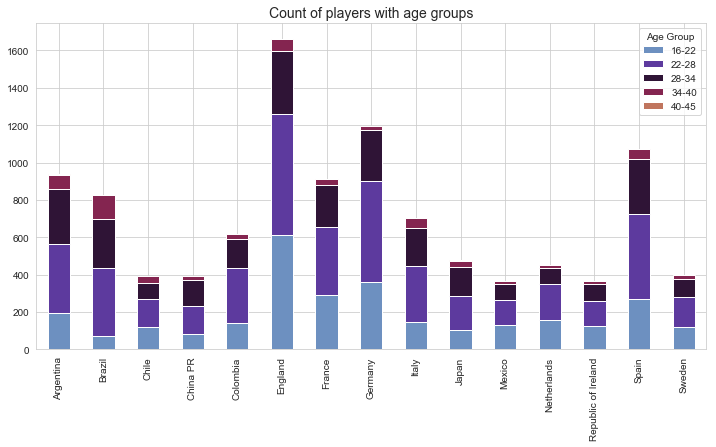

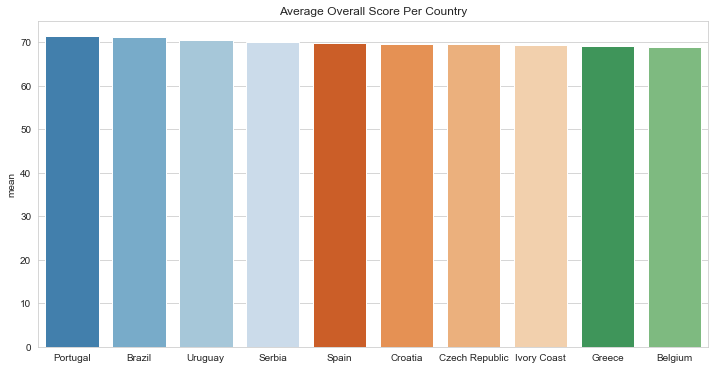

In [23]:
c1 = cm.twilight(np.linspace(.2,.8, 5))
g.plot(kind='bar',stacked=True,color=c1,figsize=(12,6)).set_title('Count of players with age groups',fontsize=14,);
plt.xlabel('')
f,ax = plt.subplots(figsize=(12,6))
a = sns.barplot(data=avg_nationality, y='mean',x='Nationality',palette='tab20c')
a.set_title('Average Overall Score Per Country',fontsize=12);
plt.xlabel('');


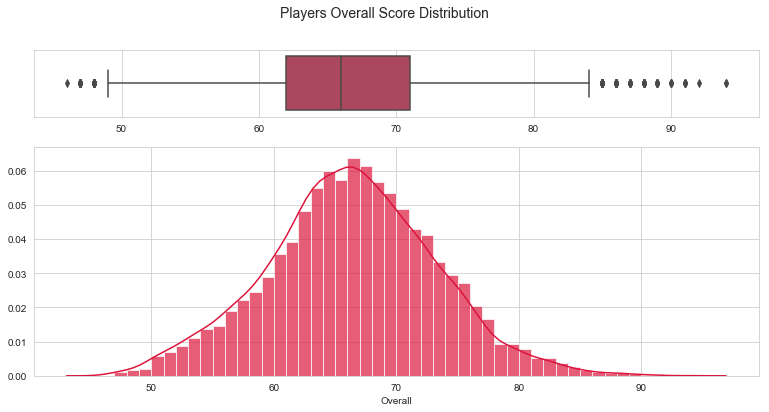

In [24]:

bins0 = data['Overall'].max() - data['Overall'].min()
f, (box,hist) = plt.subplots(2,figsize=(13,6),sharex=False,gridspec_kw={"height_ratios": (.25, .85)})
sns.boxplot(data['Overall'],ax=box,palette='inferno')
box.set_ylabel('')    
box.set_xlabel('')
sns.distplot(data['Overall'],bins=bins0,ax=hist,color='crimson', hist_kws=dict(alpha=0.69))
plt.suptitle('Players Overall Score Distribution',fontsize=14);

In [25]:
agee = pd.cut(data['Age'],[15,25,35,45])

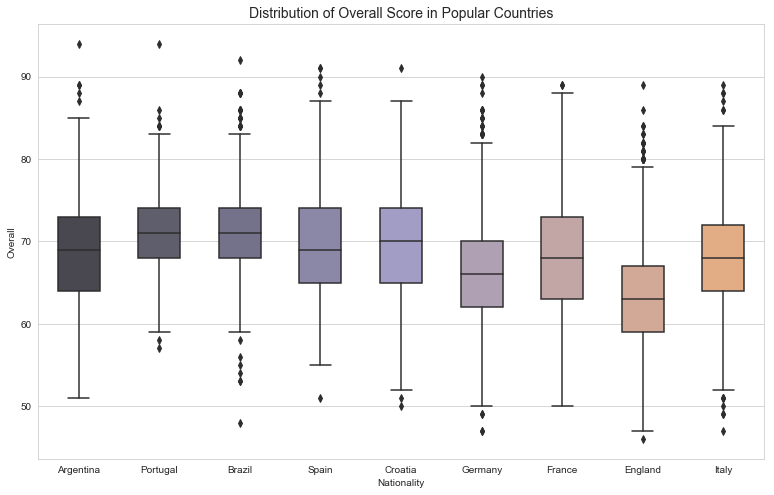

In [26]:
plt.figure(figsize=(13,8))
sns.boxplot(y='Overall',x='Nationality',data=popular
            ,width=0.52,palette='tab20c_d',saturation=.85);
plt.title('Distribution of Overall Score in Popular Countries',fontsize=14);

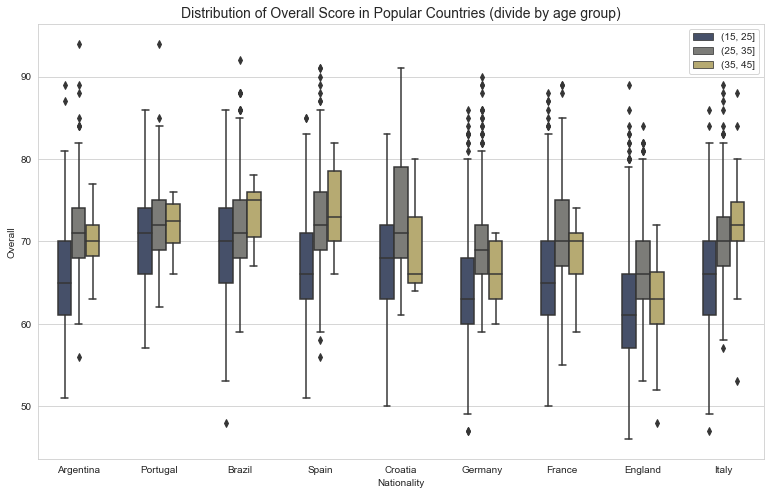

In [27]:
plt.figure(figsize=(13,8))
sns.boxplot(y='Overall',x='Nationality',data=popular,hue=agee
            ,width=0.52,palette='cividis',saturation=.85);
plt.title('Distribution of Overall Score in Popular Countries (divide by age group)',fontsize=14);
plt.legend(loc='upper right');


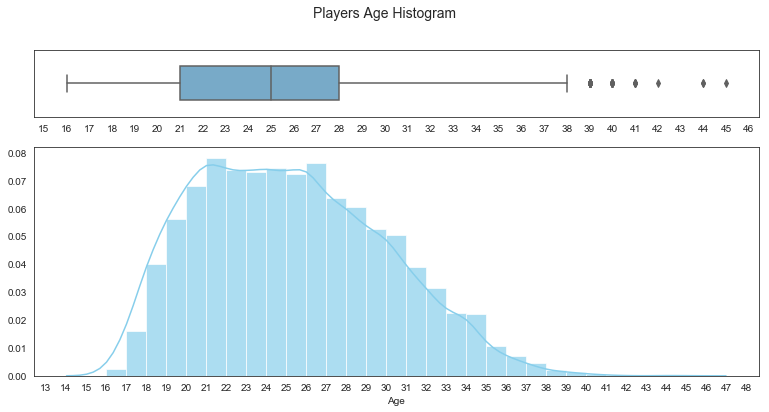

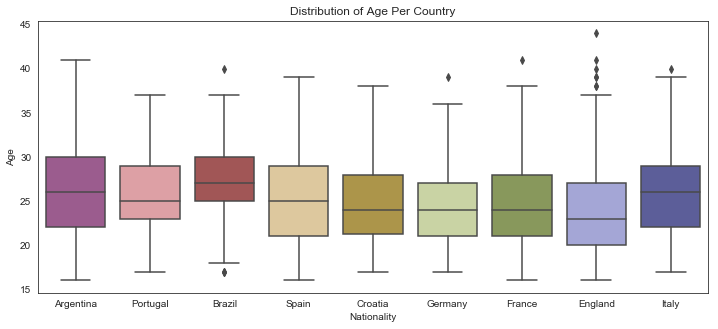

In [28]:
sns.set_style('white')
bins0 = data['Age'].max() - data['Age'].min()
f, (box,hist) = plt.subplots(2,figsize=(13,6),sharex=False,gridspec_kw={"height_ratios": (.25, .85)})
sns.boxplot(data['Age'],ax=box,palette='Blues',width=0.5)
box.set_ylabel('')    
box.set_xlabel('')
box.xaxis.set_major_locator(plticker.MultipleLocator(1))
sns.distplot(data['Age'],bins=bins0,ax=hist,color='Skyblue', hist_kws=dict(alpha=0.69))
hist.xaxis.set_major_locator(plticker.MultipleLocator(1))
plt.suptitle('Players Age Histogram',fontsize=14);
plt.figure(figsize=(12,5))
sns.boxplot(data=popular,y='Age',x='Nationality',palette='tab20b_r').set_title('Distribution of Age Per Country');

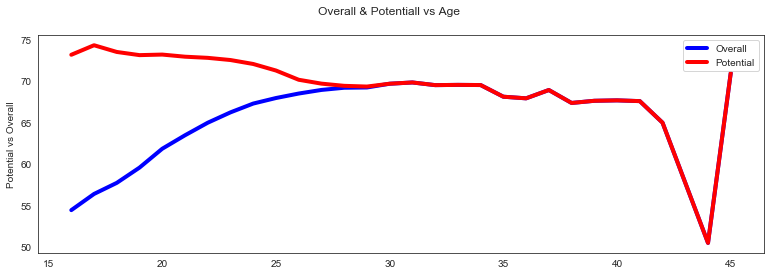

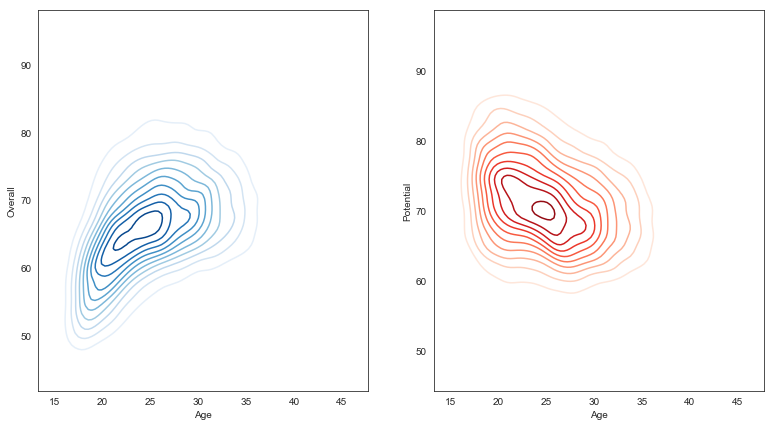

In [29]:
sns.set_style('white')
plt.figure(figsize=(13,4))
sns.lineplot(x = 'Age', y = 'Overall', ci = None, data = data, label = 'Overall',c='b',linewidth=4)
sns.lineplot(x = 'Age', y = 'Potential', ci = None, data = data, label = 'Potential',c='r',linewidth=4)
plt.ylabel('Potential vs Overall')
plt.xlabel('')
plt.suptitle('Overall & Potentiall vs Age');
plt.legend(loc = 1);
f,ax = plt.subplots(1,2,figsize=(13,7),sharex=True)
sns.kdeplot(data['Age'],data['Overall'],ax=ax[0],cmap='Blues')
sns.kdeplot(data['Age'],data['Potential'],ax=ax[1],cmap='Reds');

                    

In [30]:
Eldest = (data[data['Age']>=28][['Name','Age','Club','Value','Overall']]).sort_values(by='Age',ascending=False).head(10)
Youngest = (data[data['Age']<21][['Name','Age','Club','Value','Overall']]).sort_values(by='Age',ascending=True).head(10)

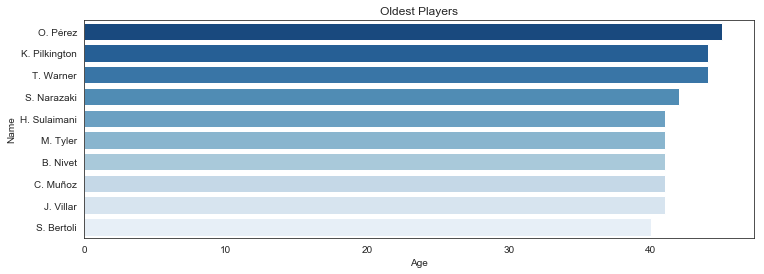

In [31]:
f,ax = plt.subplots(figsize=(12,4))
sns.barplot(data=Eldest, x='Age',y='Name',palette='Blues_r');
plt.title('Oldest Players');

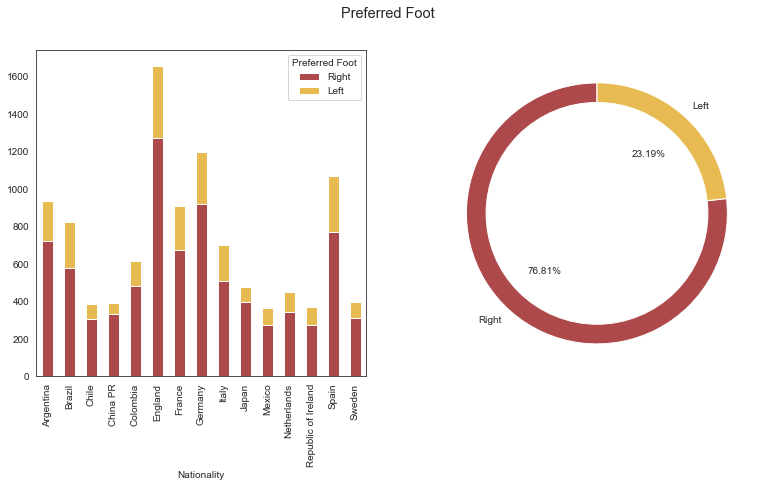

In [32]:
f,ax = plt.subplots(1,2 ,figsize=(14,10))
sns.set_style('white')
c1 = cm.tab20b_r(np.linspace(.32,.46, 2))
foot[['Right','Left']].plot(kind='bar',stacked=True,color=c1,figsize=(13,6),ax=ax[0])
plt.xlabel('');
plt.ylabel('');
my_circle=plt.Circle( (0,0), 0.85, color='white')
names=['Right','Left']
size=data['Preferred Foot'].value_counts().values.tolist()
plt.pie(size, labels=names, colors=c1,autopct='%1.2f%%',explode = (0.001,0.001),startangle=90)
p=plt.gcf()
p.gca().add_artist(my_circle)
f.suptitle("Preferred Foot", fontsize=14.5);

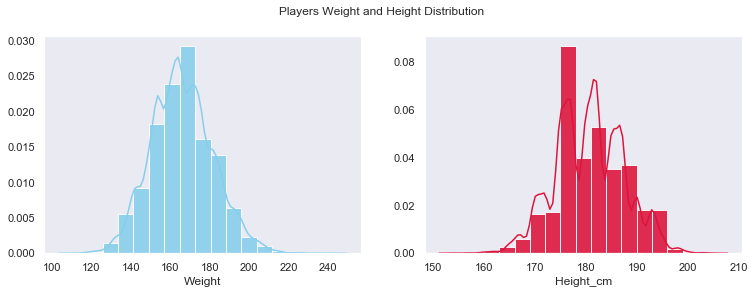

In [33]:
sns.set(style = 'dark', color_codes = True)
# We have few players with 0 cm (154 cm is minimum value so we check distribution for Height >= 154 cm)
f,ax = plt.subplots(1,2,figsize=(12.5,4))
sns.distplot(data[data['Height_cm']>=154]['Height_cm'],bins=17,color='crimson', hist_kws=dict(alpha=0.89),ax=ax[1])
sns.distplot(data['Weight'],bins=17,color='skyblue', hist_kws=dict(alpha=0.89),ax=ax[0]);
plt.suptitle('Players Weight and Height Distribution',fontsize=12);

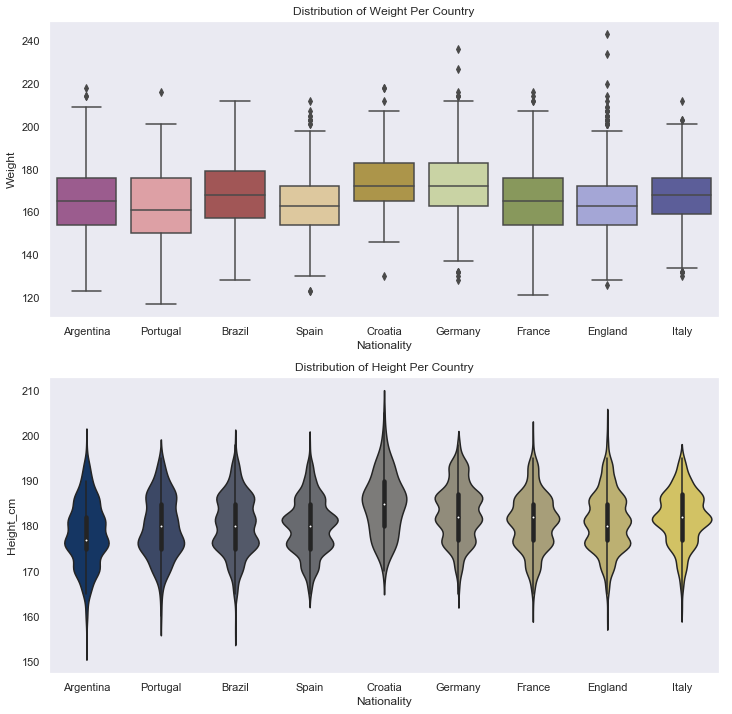

In [34]:
sns.set(style = 'dark', color_codes = True)
f,ax = plt.subplots(2,1,figsize=(12,12))
sns.boxplot(data=popular,y='Weight',x='Nationality',ax=ax[0],palette='tab20b_r').set_title('Distribution of Weight Per Country');
sns.violinplot(data=popular[popular['Height_cm']>=154],y='Height_cm',x='Nationality',ax=ax[1],palette='cividis').set_title('Distribution of Height Per Country');

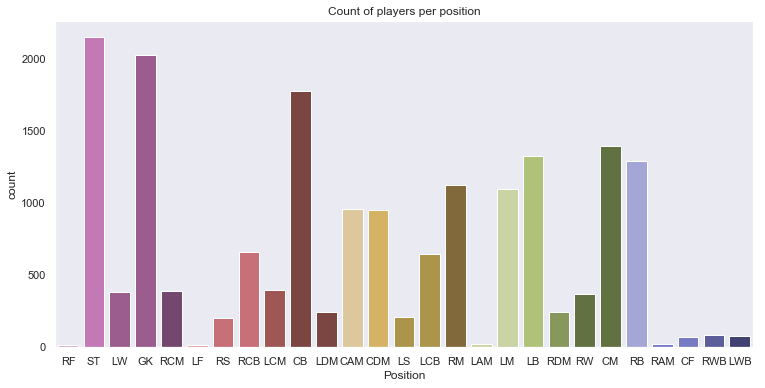

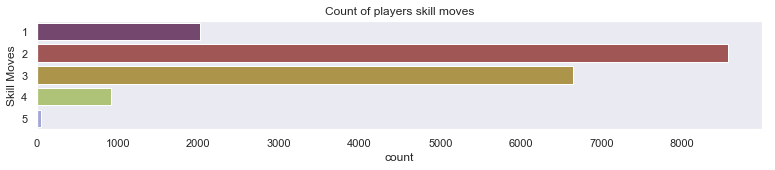

In [35]:
sns.set(style = 'dark')
plt.figure(figsize = (12.5, 6))
sns.countplot('Position', data = data, palette='tab20b_r')
plt.title('Count of players per position');
plt.figure(figsize = (13, 2))
sns.countplot(y='Skill Moves', data = data, palette='tab20b_r')
plt.title('Count of players skill moves');
players_5skills = data[data['Skill Moves']==5]

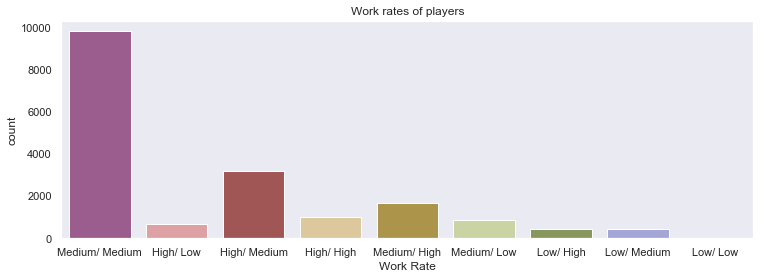

In [36]:
plt.figure(figsize = (12.4, 4))
sns.countplot(x='Work Rate', data = data, palette='tab20b_r')
plt.title('Work rates of players');

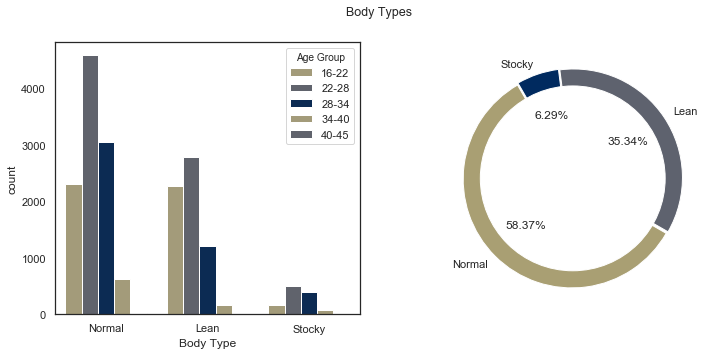

In [37]:
c3 = cm.cividis_r(np.linspace(.32,.96, 3))
sns.set(style='white')
f,ax = plt.subplots(1,2 ,figsize=(12,5))
sns.countplot(x='Body Type', data = data.sort_values(by='Age Group'), palette=c3,hue='Age Group',ax=ax[0])
my_circle=plt.Circle( (0,0), 0.85, color='white')
names=['Normal','Lean','Stocky']
size=data['Body Type'].value_counts().values.tolist()
plt.pie(size, labels=names, colors=c3,autopct='%1.2f%%',explode = (0.011,0.011,0.011),startangle=120)
p=plt.gcf()
p.gca().add_artist(my_circle)
f.suptitle("Body Types", fontsize=12.5);

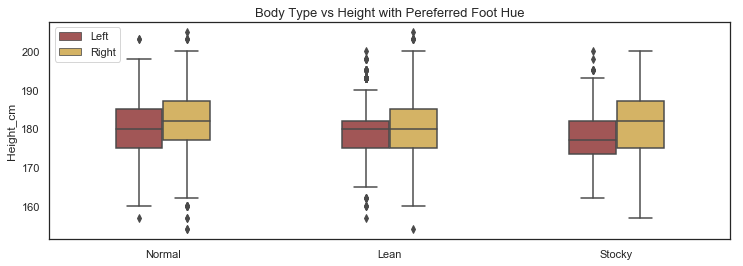

In [38]:
plt.figure(figsize=(12.2,4))
sns.boxplot(x='Body Type', y='Height_cm' ,data = data, palette=c1,hue='Preferred Foot',width=0.42);
plt.title('Body Type vs Height with Pereferred Foot Hue',fontsize=13);
plt.legend(loc=2)
plt.xlabel('');

In [39]:
popular.sample()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Age Group,Height_cm,Height Group,Lean,Normal,Stocky
3510,D. Čop,28,Croatia,72,72,Real Valladolid CF,3200000.00,14000.00,Right,1.00,3.00,3,High/ Medium,Lean,ST,NaN,"Jun 30, 2019",6'0,161.00,58.00,74.00,68.00,69.00,75.00,68.00,74.00,75.00,57.00,73.00,66.00,50.00,66.00,73.00,59.00,70.00,65.00,73.00,68.00,72.00,59.00,32.00,78.00,66.00,78.00,71.00,27.00,30.00,30.00,12.00,12.00,16.00,13.00,12.00,28-34,182,Normal,1,0,0


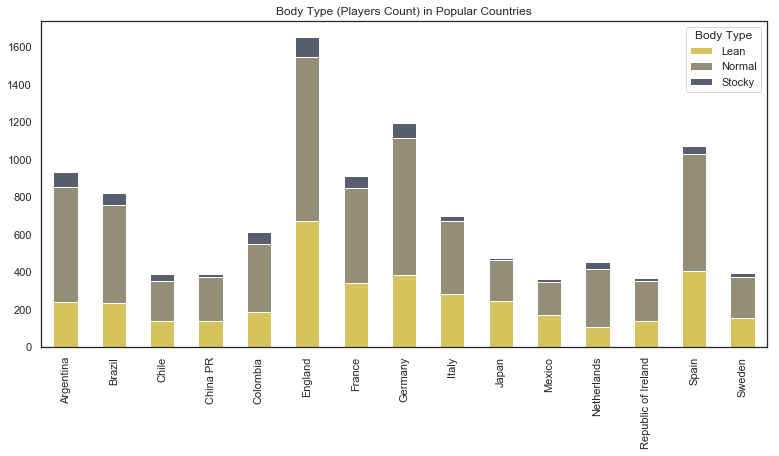

In [40]:
c5 = cm.cividis_r(np.linspace(.152,.66, 3))
bdy.plot(kind='bar',stacked=True,color=c5,figsize=(13,6))
plt.title('Body Type (Players Count) in Popular Countries');
plt.xlabel('');